# Sistemas de Inteligencia Artificial: TP0

Para utilizar el código provisto por la cátedra, primero se optó por hacer una simple función que lea el achivo de configuración destinado a especificiar los parámetros mutables de captura. Dicho archivo de configuración deberá ser modificado previo a varias celdas de este jupyter (Se notificará cuando sea necesario). 

In [7]:
from src.pokemon import Pokemon, PokemonFactory, StatusEffect
from typing import Tuple

# Returns a Tuple containing the pokemon and pokeball specified in the catching_mutable_data.json file
def get_catching_data_from_config() -> Tuple[Pokemon, str]:
    factory = PokemonFactory("pokemon.json")
    with open("configs/catching_mutable_data.json", "r") as f:
        config = json.load(f)

    ball = config["pokeball"]
    pokemon = factory.create(config["pokemon"], config["level"], StatusEffect.from_string(config["status"]), config["hp"])    

    return (pokemon, ball)

También se agregó un método `from_string` a la clase `StatusEffect` para transformar el string de un estado a su Enum correspondiente.

### Ejercicio 1
Item a)

Para este ejercicio, quisimos evaluar la probabilidad de captura promedio de cada pokébola. Para esto, decidimos probar lanzar 1000 tiradas con cada pokémon específico en condiciones ideales (HP:100%, LVL: 100, STATUS: NONE), usando la pokébola a evaluar y, en cada uno de ellos, sacar el promedio de efectividad. Luego estos promedios para cada pokémon los guardamos en un arreglo y sacamos su media para sacar la probabilidad de captura de la pokébola.

In [43]:
catch_eff_list = []

Para la siguiente parte, se modificó el archivo `catching_mutable_data.json` para tener las condiciones ideales mencionadas fijas y se fue cambiando el nombre del pokémon antes de correr la celda para agregar la efectividad de captura al arreglo `catch_effeciveness_list` en cada intento.

In [40]:
import json
import numpy as np
from src.catching import attempt_catch

pokemon, ball = get_catching_data_from_config()

real_catch_rate = attempt_catch(pokemon, ball)[1]
catch_results = [ int(attempt_catch(pokemon, ball)[0]) for _ in range(1000) ]
catch_effectiveness = np.mean(catch_results)

catch_eff_list.append(catch_effectiveness)

print(f"Pokémon: {pokemon.name}")
print(f"Real catch rate: {real_catch_rate}")
print(f"Calculated catch rate: {catch_effectiveness}")

Pokémon: onix
Real catch rate: 0.0586
Calculated catch rate: 0.066


In [50]:
print(catch_eff_list)
print(np.mean(catch_eff_list))

[]
nan


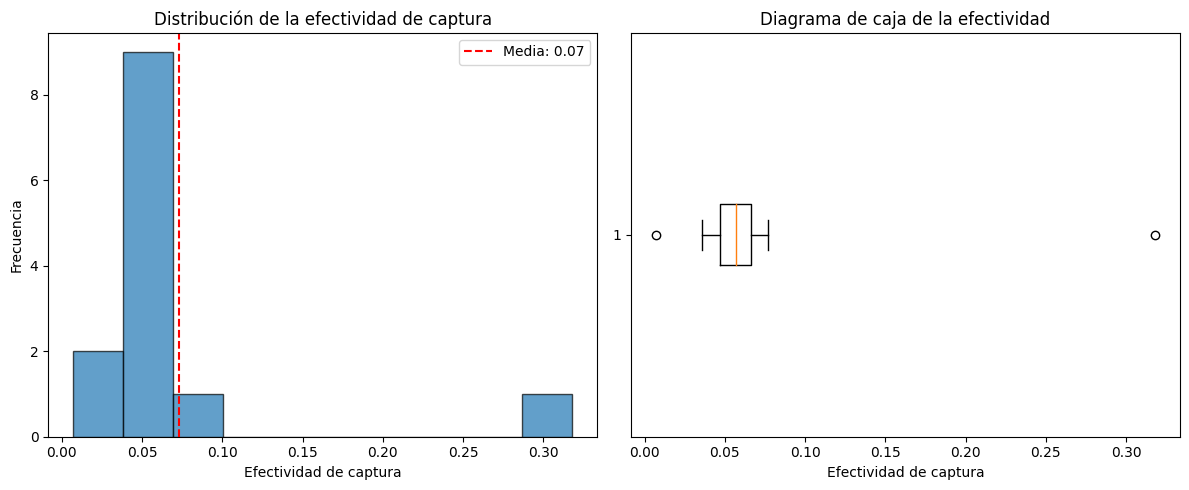

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Simulación de datos (si ya tienes catch_eff_list, usa esa variable)
# catch_eff_list = [...]  # Tu lista de probabilidades

# Crear la figura
plt.figure(figsize=(12, 5))

# 🔹 **Histograma**
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.hist(catch_eff_list, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(catch_eff_list), color='red', linestyle='dashed', label=f'Media: {np.mean(catch_eff_list):.2f}')
plt.xlabel("Efectividad de captura")
plt.ylabel("Frecuencia")
plt.title("Distribución de la efectividad de captura")
plt.legend()

# 🔹 **Boxplot**
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.boxplot(catch_eff_list, vert=False)
plt.xlabel("Efectividad de captura")
plt.title("Diagrama de caja de la efectividad")

# Mostrar gráficos
plt.tight_layout()
plt.show()
